In [6]:
using JLD2, UnPack
using Plots, LaTeXStrings

## VUMPS SIS

In [11]:
data = load("data/vumps_sis.jld2")
@unpack λ, ρ, ds, A0, ε, err, ovl, bel, AA, A, maxiter,
    ps, p_ss_montecarlo, p_ss_mpbp = data;

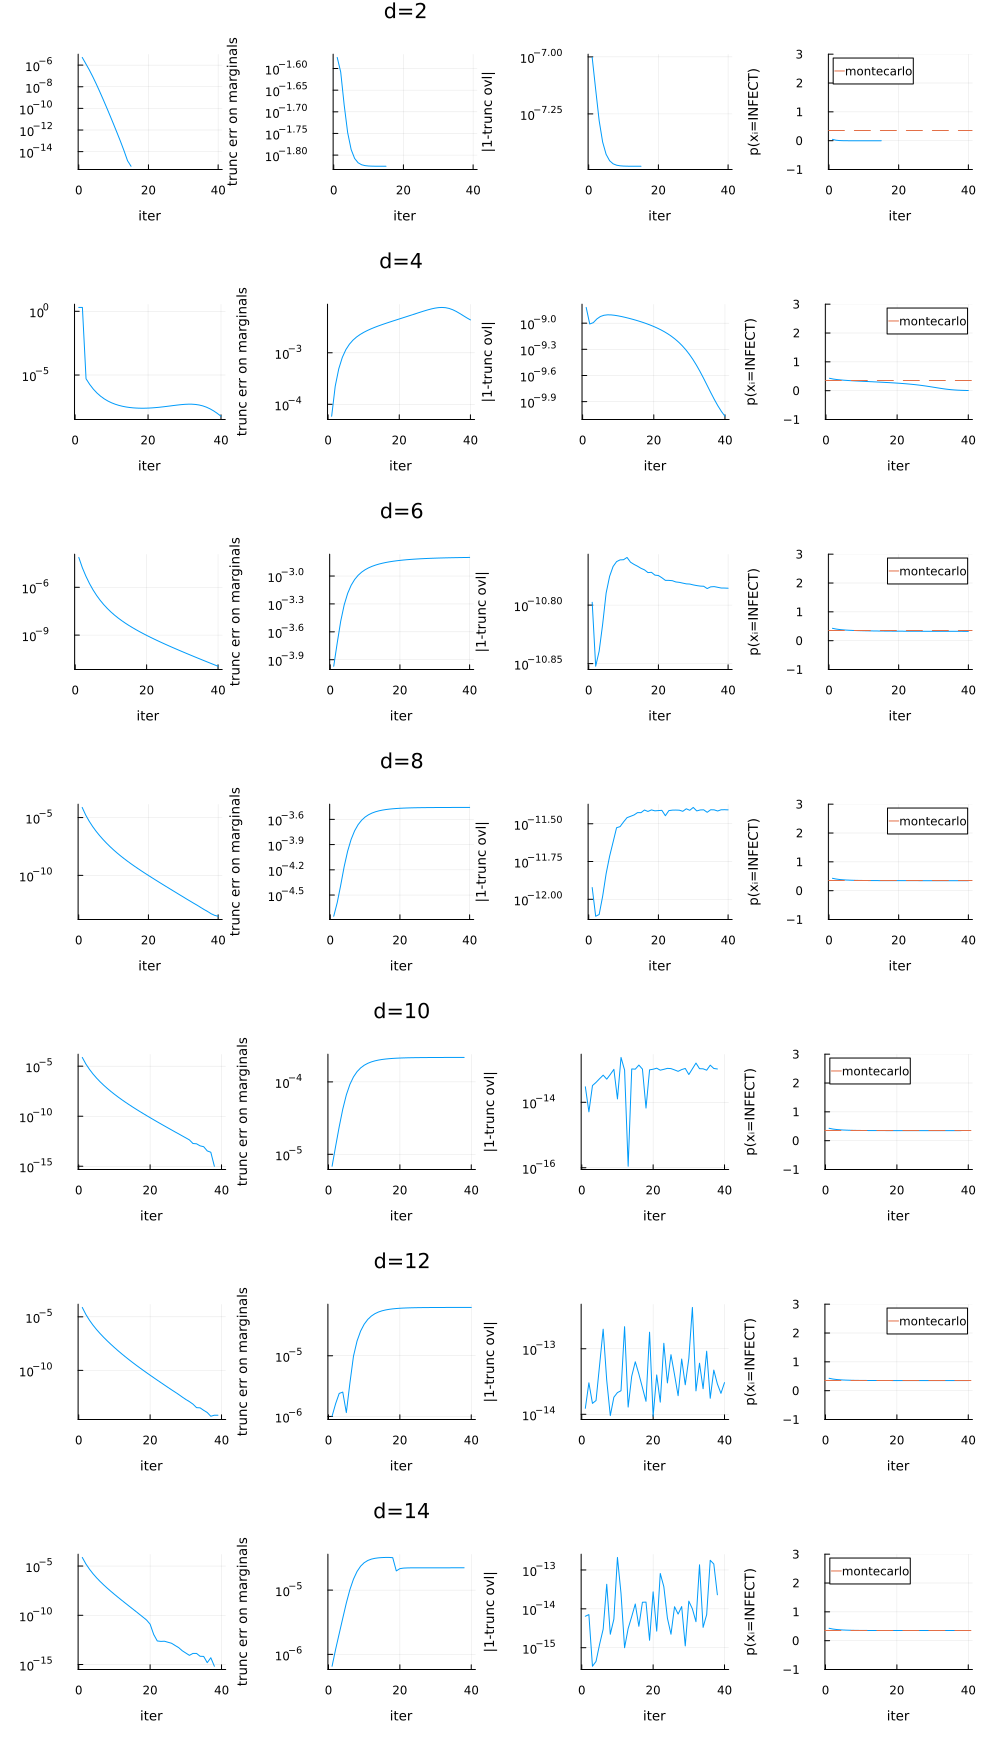

In [12]:
pls = map(zip(ε, err, ovl, ds, bel)) do (εs, errs, ovls, d, beliefs)
    p1 = plot(replace(εs, 0.0 => NaN), xlabel="iter", yaxis=:log10, ylabel="converg error", label="")
    p2 = plot(errs, xlabel="iter", yaxis=:log10, ylabel="trunc err on marginals", label="", title="d=$d")
    p3 = plot(abs.(1 .- replace(ovls, 1.0 => NaN)), xlabel="iter", yaxis=:log10, ylabel="|1-trunc ovl|", label="")
    p4 = plot([b[2] for b in beliefs], ylabel="p(xᵢ=INFECT)", ylims=(-1,3), label="")
    hline!(p4, [p_ss_montecarlo] , label="montecarlo", ls=:dash)
    plot(p1, p2, p3, p4, layout=(1,4), size=(1200,250), margin=5Plots.mm, labelfontsize=9)
end
pl = plot(pls..., layout=(length(ds),1), size=(1000, 250*length(ds)), margin=5Plots.mm,
    xticks = 0:(maxiter÷2):maxiter, xlabel="iter")

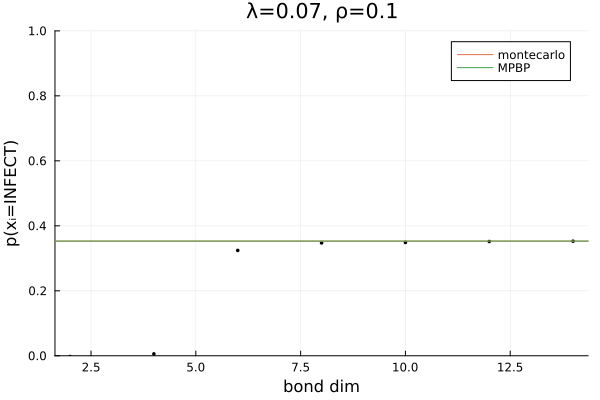

In [13]:
ps = [b[findlast(x->!all(isnan, x), b)][2] for b in bel]
pl_ps = scatter(ds, ps, xlabel="bond dim", ylabel="p(xᵢ=INFECT)", label="",
    ms=2, c=:black)
hline!(pl_ps, [p_ss_montecarlo], label="montecarlo", ylims=(0,1))
hline!(pl_ps, [p_ss_mpbp] , label="MPBP")
plot!(pl_ps, title="λ=$λ, ρ=$ρ")